# 3D Object Detection with point clouds

## Initialization

In [1]:
# Install required libraries
!pip install -U torch_snippets
!git clone https://github.com/sizhky/Complex-YOLOv4-Pytorch.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 45.8 MB/s eta 

Cloning into 'CSRNet-pytorch'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Receiving objects: 100% (92/92), 623.74 KiB | 17.82 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [31]:
# Import libraries
import numpy as np

import torch
from torch_snippets import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(f"PyTorch Version: {torch.__version__}")
!nvidia-smi # check if GPU is available
%matplotlib inline

PyTorch Version: 2.2.0

zsh:1: command not found: nvidia-smi


In [32]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)

Running on: cpu

In [33]:
# Choose a random point cloud file
files = Glob('kitti/training/velodyne')
chosen_file = choose(files)
pts = np.fromfile(chosen_file, dtype=np.float32).reshape(-1, 4) # x, y, z, intensity
pts

array([[79.572,  7.193,  2.911,  0.   ],
       [78.355,  8.449,  2.874,  0.   ],
       [40.213,  4.707,  1.578,  0.17 ],
       ...,
       [ 7.346, -2.39 , -3.486,  0.   ],
       [ 7.349, -2.365, -3.484,  0.   ],
       [ 7.359, -2.356, -3.487,  0.   ]], dtype=float32)

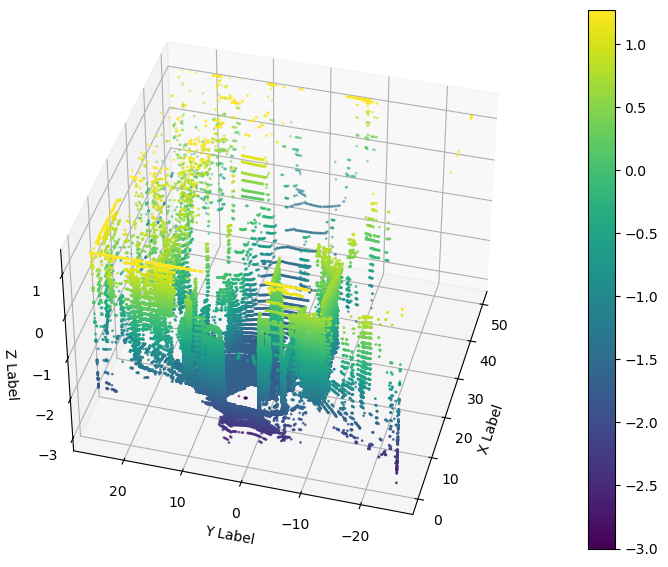

In [34]:
# Clip the far away points
x = np.clip(pts[:, 0], 0, 50)
y = np.clip(pts[:, 1], -25, 25)
z = np.clip(pts[:, 2], -3, 1.27)

# Plot the point cloud
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(x, y, z, c=z, cmap='viridis', s=1)
fig.colorbar(img)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set the view angle
elev = 40  # Elevation angle in the z plane (default 30 degrees)
azim = 195  # Azimuthal angle in the x, y plane (default 0 degrees)
ax.view_init(elev=elev, azim=azim)

plt.show()

In [42]:
# Visualize a sample image with bounding boxes and point cloud
%cd Complex-YOLOv4-Pytorch/src/data_process
!python kitti_dataloader.py --output-width 608

len val dataloader: 1414


Press n to see the next sample >>> Press Esc to quit...


In [ ]:
# Train the model
$ cd ..
!python train.py --gpu_idx 0 --batch_size 2 --num_workers 4 --num_epochs 5

In [ ]:
# Test the model
!python test.py --gpu_idx 0 --pretrained_path ../checkpoints/complexer_yolo/Model_complexer_yolo_epoch_5.pth --cfgfile ./config/cfg/complex_yolov4.cfg --show_image